# Trabalho Dataset GDS1686

## Base de Dados:
Este estudo focou-se na investigação dos efeitos da privação de sono no cérebro de moscas fêmeas da espécie Drosophila melanogaster, ao analisar as variações na expressão genética destes insetos. Os genes examinados já tinham sido documentados como sendo regulados de maneira distinta durante períodos de sono ou atividade.

Foram obtidas informações sobre os processos moleculares dinâmicos que sofrem alterações durante a vigília e o sono. Para isso, realizou-se um estudo de perfil de expressão de RNA, analisando as mudanças temporais no cérebro da D. melanogaster em relação à duração do sono ou vigília anteriores. O projeto experimental possibilitou determinar se os genes identificados como regulados de forma diferencial entre o sono e a vigília estavam a ser regulados para cima (ativados) ou para baixo (desativados) nesses estados.

Parte dos dados está relacionada ao controlo dos processos circadianos, com a coleta de animais em quatro pontos de tempo (0, 2, 4 e 6 horas) desde o início do período de descanso consolidado [Zeitgeber Time (ZT) 14)], sob duas condições: privação de sono e sono espontâneo. O ponto de tempo "0" refere-se ao controlo do período de sono.

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, f_classif

## Etapa 1

In [3]:
# Upload dos dados e metadados
# Os metadados têm menos variáveis (4) e são de menor dimensão

dados = pd.read_csv("gds1686.csv", sep=',', index_col = 0)
metaDados = pd.read_csv("meta-gds1686.csv", sep = ",", index_col = 0)

#### Dados e metadados

In [34]:
# Contagem do número de atributos e instâncias dos dados e metadados
# Os metadados têm as varíaveis: Sample, Protocol, Time, Description

print('Dados: ', dados.values.shape)
print('Metadados: ', metaDados.values.shape)

# análise dos dados
data.describe()

Dados:  (14010, 30)
Metadados:  (30, 4)


,141200_at,141201_at,141202_at,141203_at,141204_at,141205_at,141206_at,141207_at,141208_at,141209_at,...,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,3.607873,5.489350,6.952435,5.249813,4.599524,5.954323,6.990018,4.392433,5.405541,7.439440,...,4.944844,4.178191,3.572110,2.385417,2.683112,2.808675,2.618219,2.465750,2.392707,2.867779
std,0.134341,0.091277,0.200513,0.213595,0.109908,0.211262,0.125764,0.250060,0.193319,0.134838,...,1.395989,0.638595,1.155027,0.110678,0.086954,0.093582,0.103548,0.102161,0.086281,0.089716
min,3.337230,5.314440,6.531440,4.644220,4.388890,5.548860,6.773590,3.662410,5.021590,7.122190,...,3.750490,3.496770,2.624210,2.247740,2.467410,2.653150,2.441050,2.334520,2.226010,2.692800
25%,3.499017,5.413712,6.823830,5.186327,4.506510,5.808288,6.906235,4.248295,5.287640,7.366212,...,4.025593,3.727108,2.796718,2.304302,2.642300,2.745170,2.539148,2.392658,2.339292,2.812485
50%,3.596040,5.497505,6.991820,5.280945,4.604750,5.947660,6.983225,4.440900,5.403820,7.423025,...,4.183005,3.925130,2.948045,2.354715,2.677775,2.792335,2.622440,2.437870,2.387635,2.867830
75%,3.696905,5.556718,7.126535,5.358195,4.680313,6.071495,7.066717,4.500497,5.517870,7.528073,...,6.571570,4.771835,4.796132,2.457800,2.738055,2.855735,2.677685,2.531627,2.444327,2.909845
max,3.952610,5.642830,7.231070,5.571400,4.795950,6.380520,7.301070,4.858860,5.840410,7.731290,...,8.201870,5.836320,6.672570,2.685690,2.840200,3.043230,2.896040,2.730310,2.618280,3.040000


In [33]:
# É feita a transposta para ficarem com o mesmo nº de atributos

data=dados.transpose()
print(data)

          141200_at  141201_at  141202_at  141203_at  141204_at  141205_at  \
GSM95424    3.77628    5.64283    6.80354    5.42622    4.58124    5.94997   
GSM95425    3.44458    5.47795    7.01271    5.53965    4.55277    5.94535   
GSM95444    3.76067    5.53370    6.81637    5.38007    4.45829    5.97233   
GSM95324    3.38473    5.58603    6.66803    5.26991    4.45801    5.62635   
GSM95421    3.57696    5.60629    6.73312    5.18558    4.56932    5.79158   
GSM95423    3.71310    5.57885    6.96012    5.36280    4.45476    5.75519   
GSM95325    3.59374    5.60380    6.55975    5.06871    4.47072    5.63485   
GSM95420    3.68243    5.40856    6.91156    5.31143    4.60259    5.84344   
GSM95422    3.71822    5.53217    6.53144    5.24742    4.68283    5.89039   
GSM95290    3.95261    5.55998    7.19880    5.51060    4.74907    6.27263   
GSM95292    3.67817    5.37299    7.10604    5.55732    4.73757    6.38052   
GSM95293    3.57283    5.60045    6.99170    4.92440    4.60691 

In [35]:
# Missing Values - verifica valores em falta

print("Missing Values nos dados:")
print(data.isnull().sum().sum())   

# o primeiro soma ao longo das colunas e o segundo adiciona todas essas contagens 

print("Missing Values nos metadados:")
print(metaDados.isnull().sum().sum())

Missing Values nos dados:
0
Missing Values nos metadados:
0


In [36]:
# remover os genes que têm todos os valores como NaN (dados nulos), usando o parâmetro inplace = True para alterar directamente na variável data

data.dropna(inplace = True)

#### Verificar se não é alterada a dimensão dos dados

In [37]:
# Ver a nova dimensão dos dados

data.values.shape 

(30, 14010)

In [38]:
# Descrição dos tipos de atributos de dados

print("Os dados são do tipo:")
print(data.dtypes)

Os dados são do tipo:
141200_at               float64
141201_at               float64
141202_at               float64
141203_at               float64
141204_at               float64
                         ...   
AFFX-TrpnX-M_at         float64
AFFX-YEL002c/WBP1_at    float64
AFFX-YEL018w/_at        float64
AFFX-YEL021w/URA3_at    float64
AFFX-YEL024w/RIP1_at    float64
Length: 14010, dtype: object


In [39]:
# Descrição dos tipos de atributos dos metadados

print("Os metadados são do tipo:")
print(metaDados.dtypes)

Os metadados são do tipo:
sample         object
protocol       object
time           object
description    object
dtype: object


In [40]:
# Calcular as estatísticas e ordenar pelo desvio padrão
data_stats = data.apply(lambda x: [x.min(), x.max(), x.std()]).T

# Adicionar colunas para min, max, e std
data_stats.columns = ['min', 'max', 'std']

# Ordenar pelo desvio padrão
data_stats.sort_values(by='std', ascending=False)

,min,max,std
AFFX-DapX-3_at,2.67399,9.13717,2.331775
AFFX-DapX-M_at,2.57384,8.60097,2.127964
AFFX-DapX-5_at,2.59945,7.75179,1.726795
143096_f_at,3.86214,9.04036,1.529624
AFFX-ThrX-3_at,3.75049,8.20187,1.395989
...,...,...,...
153140_at,5.71645,5.99938,0.059461
141690_at,6.89647,7.16224,0.058273
153642_at,6.20163,6.41713,0.049048
153151_at,4.39932,4.59023,0.048230


Considerando o facto de haver apenas 30 amostras, não foi considerado relevante remover outliers, e não foram identificados valores nulos. Como todos os dados estão representados na mesma escala (nível de expressão génica) e o número de atributos é consistente para todas as amostras, não há necessidade total de normalização ou equilíbrio dos dados.

## Etapa 2

#### Resumo:
 - PCA
 - Gráfico 
 - Dendograma

O conjunto de dados possui um número considerável de atributos - 14.010 - correspondentes aos diferentes genes estudados. Uma análise de Componentes Principais (PCA) será realizada para reduzir esse número, levando em consideração apenas os atributos que explicam a maioria da variabilidade dos dados. Por exemplo, ao aplicar uma PCA que explica 90% dessa variabilidade, reduz-se o número de atributos aos que a explicam.

[2.39691084e-01 1.58470120e-01 7.16860362e-02 4.50942771e-02
 3.79773784e-02 3.63413360e-02 3.27745431e-02 2.90720793e-02
 2.77946897e-02 2.40645040e-02 2.23265235e-02 2.06159151e-02
 1.96604660e-02 1.90771731e-02 1.86079279e-02 1.76392933e-02
 1.72669578e-02 1.62588555e-02 1.57998798e-02 1.52603008e-02
 1.47597314e-02 1.43374509e-02 1.40301536e-02 1.31051139e-02
 1.25497475e-02 1.23073635e-02 1.19131001e-02 1.12827570e-02
 1.02352418e-02 1.48334464e-35]
0.702966047660038


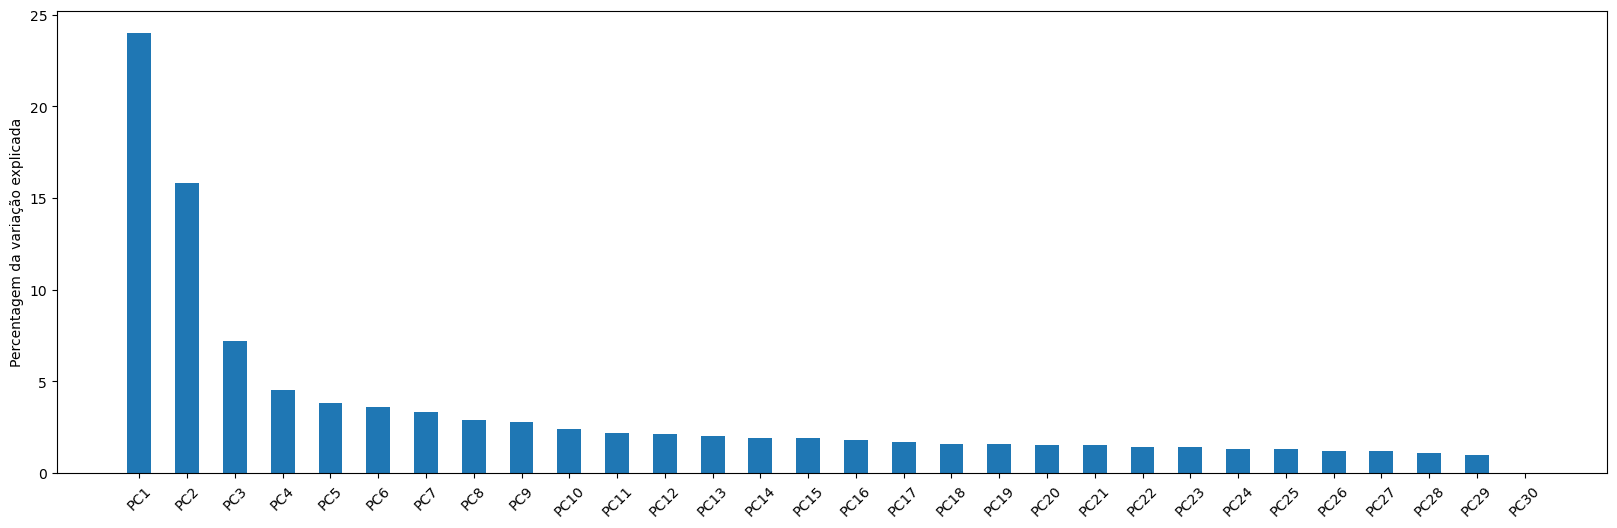

0.702966047660038 9
0.7252925711182634 10
0.7459084862141241 11
0.7655689522059181 12
0.7846461252670309 13
0.8032540531492964 14
0.8208933464185277 15
0.8381603042439877 16
0.8544191596971646 17
0.870219039463503 18
0.885479340219954 19
0.9002390716175566 20
0.9145765225538591 21
0.9286066761961073 22
0.9417117901049409 23
0.9542615375943397 24
0.96656890113659 25
0.9784820012019475 26
0.9897647582223361 27
1.0000000000000002 28
1.0000000000000002 29


In [41]:
n=30
# 30 amostras para análise


pca = PCA(n_components=n)
data_scale = preprocessing.scale(data) #Realiza a padronização dos dados. Prática comum antes de aplicar PCA para garantir que todas as variáveis tenham a mesma escala
pca.fit(data_scale)                                                     # media e desvio
x_reduced = pca.transform(data_scale)   
principalComponents = pca.fit_transform(x_reduced)                      # escala
print (pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_[:10]))                          # 90% da variabilidade; Imprime a soma das proporções da variância explicada pelos 10 primeiros componentes principais

per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=["PC"+str(x) for x in range(1,len(per_var)+1)]                  
plt.figure(figsize=(20, 6))  # width:20, height:3

plt.bar([x*2 for x in range(1,len(per_var)+1)], height=per_var, align="center", width=1)
plt.ylabel("Percentagem da variação explicada")
plt.xticks([x*2 for x in range(1,len(per_var)+1)], labels, rotation=45)


plt.show()

soma=0
for i in range(len(pca.explained_variance_ratio_)):
    soma+=pca.explained_variance_ratio_[i]
    if soma>=0.70:
        print(soma,i)

## Dúvida 
Em vez de meter só os protocol se deveriamos de acrescentar o tempo

Em seguida, fez-se uma análise dos scores do PCA com representação gráfica, de forma a melhor identificar correlações entre os dados e a perceber se existem tendências entre os diferentes protocolos implementados. Esta análise posiciona as amostras num espaço bidimensional, onde no eixo do x são separadas segundo o score do primeiro PCA e no eixo do y do segundo PCA.

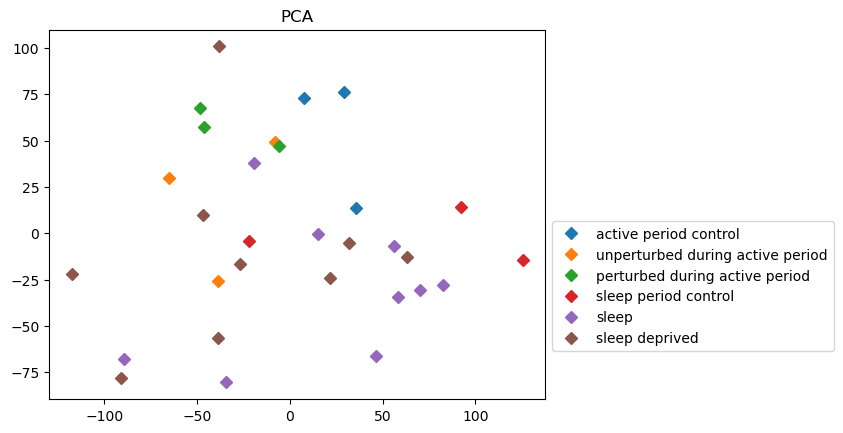

In [42]:

for tipo in metaDados['protocol'].unique():
    sp = data.index[metaDados['protocol']==tipo]
    l=[]
    for x in sp:
        idx = data.index.get_loc(x)
        l.append(idx)
    plt.plot(x_reduced[l,0],x_reduced[l,1], 'D' , label=tipo)
plt.title("PCA")
plt.legend(loc='best', shadow=False, bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.show()

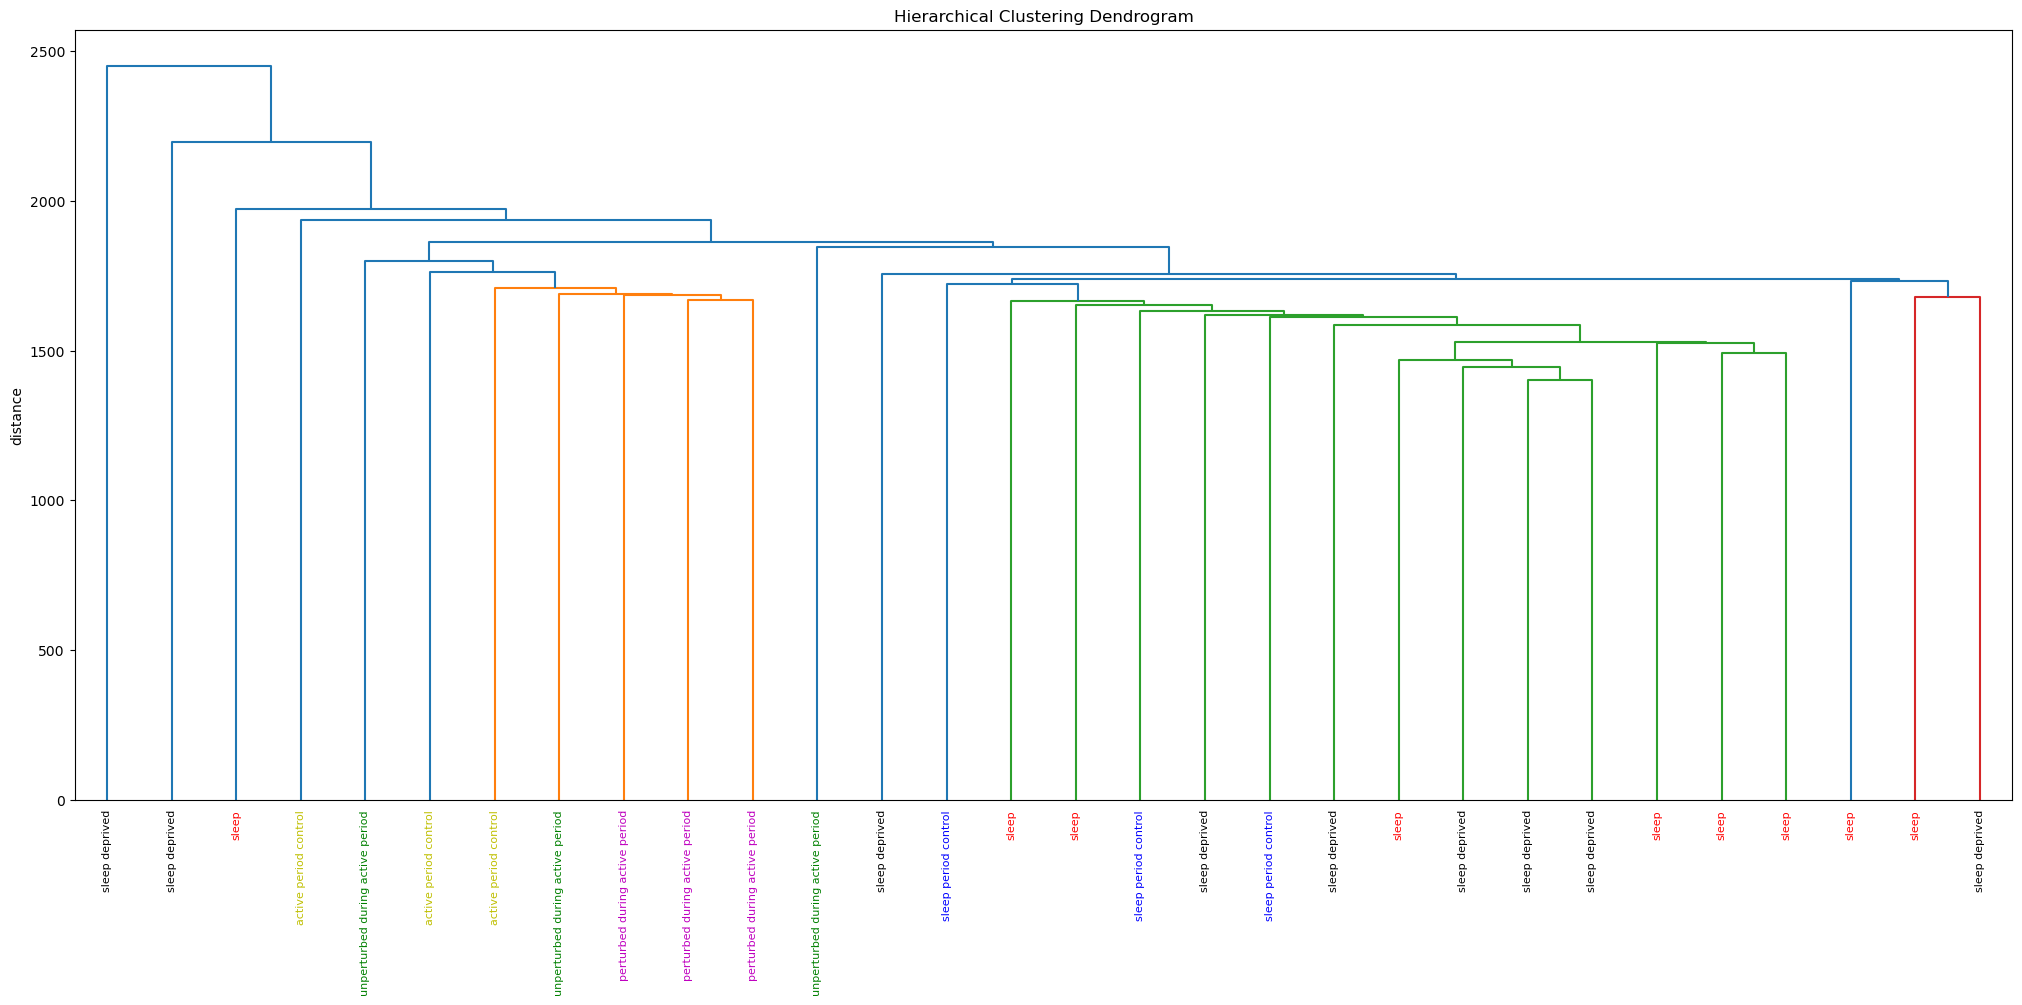

In [43]:
# Cria-se um dendograma - resultado de um clustering hierárquico 

Z = linkage(data, metric='cityblock')
metaDados['labels'] = metaDados['protocol'] 

# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(metaDados['labels']),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')


# Assignment of colors to labels: 'a' is red, 'b' is green, etc.
label_colors = {'active period control': 'y', 
                'unperturbed during active period': 'g', 
                'perturbed during active period': 'm',
                'sleep period control': 'b', 
                'sleep': 'r',
                'sleep deprived': 'k',
               }
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

### Método do cotovelo - Escolher o k

## Dúvida
Tentamos variar o k várias vezes mas o cotovelo nunca ficou constante, os valores nunca estabilizaram

c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

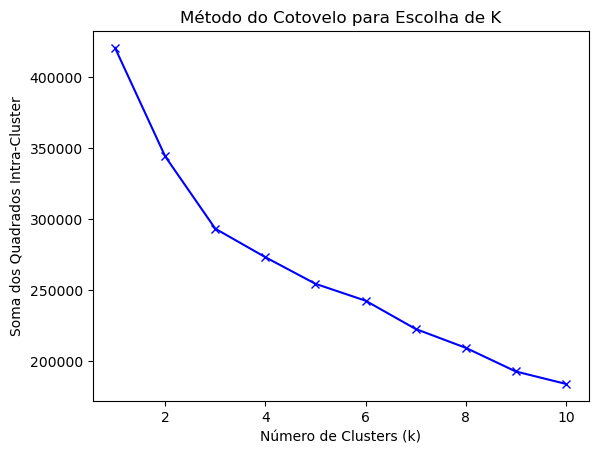

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Suponha que X seja seus dados
distortions = []
K_range = range(1, 11)

for k in K_range:
    kmeanModel = KMeans(n_clusters=k, max_iter=1000)
    kmeanModel.fit(data_scale)
    distortions.append(kmeanModel.inertia_)

plt.plot(K_range, distortions, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Quadrados Intra-Cluster')
plt.title('Método do Cotovelo para Escolha de K')
plt.show()

In [45]:
from sklearn.cluster import KMeans

k=8
kmeans = KMeans(n_clusters=k, max_iter=1000)
kmeans.fit(data_scale)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pd.crosstab(labels, metaDados['protocol'], rownames=['clusters'] )

c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


protocol,active period control,perturbed during active period,sleep,sleep deprived,sleep period control,unperturbed during active period
clusters,,,,,,
0,0,0,5,0,2,0
1,0,0,1,5,1,0
2,2,3,0,0,0,2
3,0,0,1,1,0,0
4,0,0,0,1,0,0
5,1,0,0,0,0,0
6,0,0,1,1,0,1
7,0,0,1,1,0,0


## Etapa 3

### Modelos com Percentage Split

In [51]:
# Distribuímos 30% dos valores para teste e os outros 70% para treino

from sklearn.model_selection import train_test_split

dados_entrada = data.values
#dados_saida = meta_data['labels'].values
dados_saida = metaDados['protocol'].values
entrada_proc = preprocessing.scale(dados_entrada)
print(len(entrada_proc))

treinoX, testeX, treinoY, testeY = train_test_split(entrada_proc, dados_saida, test_size=0.3)
print("TreinoX ", treinoX.shape)
print("TesteX", testeX.shape)
print("TreinoY ", treinoY.shape)
print("TesteY", testeY.shape)

30
TreinoX  (21, 14010)
TesteX (9, 14010)
TreinoY  (21,)
TesteY (9,)


#### Verificação da distribuição dos dados para treino e para teste

sleep deprived                      7
sleep                               6
unperturbed during active period    3
sleep period control                2
perturbed during active period      2
active period control               1
dtype: int64


<Axes: >

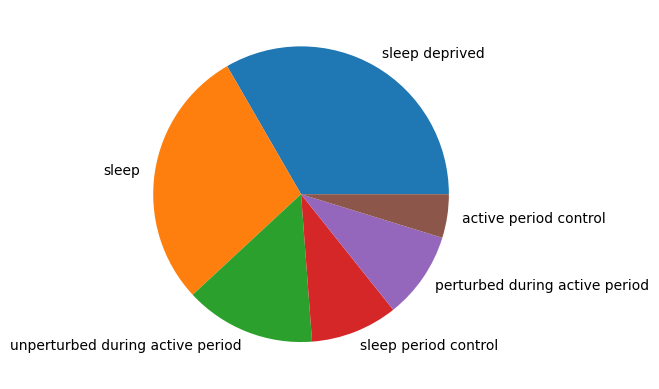

In [52]:

treinoY_series = pd.Series(treinoY) # é preciso converter para um objeto tipo pandas para poder usar o value_counts()
contagem_treino = treinoY_series.value_counts()
print(contagem_treino)
contagem_treino.plot.pie()

sleep                             3
sleep deprived                    2
active period control             2
sleep period control              1
perturbed during active period    1
dtype: int64


<Axes: >

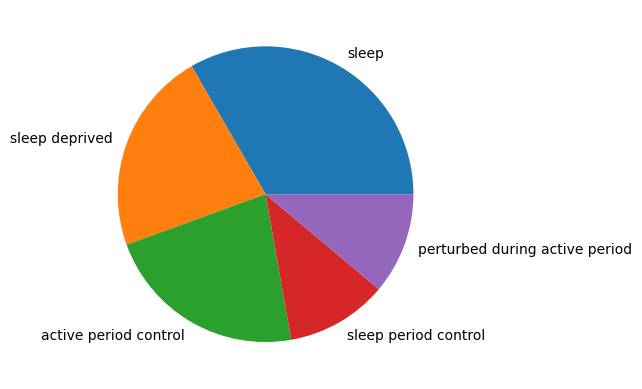

In [53]:
testeY_series = pd.Series(testeY)
contagem_teste = testeY_series.value_counts()
print(contagem_teste)
contagem_teste.plot.pie()

## Modelos de Machine Learning

#### K-nearest neightbors (KNN)

In [54]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(treinoX, treinoY)
preds_knn = knn.predict(testeX)
print('Accuracy: ', accuracy_score(preds_knn, testeY))

Accuracy:  0.5555555555555556


#### Logistic regression

In [59]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(solver = "liblinear", multi_class = "auto")
logistic = logistic.fit(treinoX, treinoY)
print('Accuracy: ', logistic.score(testeX,  testeY))

Accuracy:  0.7777777777777778


#### Decision Tree 

In [60]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(treinoX, treinoY)
print('Accuracy: ', tree_model.score(testeX,  testeY))

Accuracy:  0.4444444444444444


#### SVMs linear kernel

In [63]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear', C=1)
svm_model = svm_model.fit(treinoX, treinoY)
print('Accuracy: ', svm_model.score(testeX,  testeY))

Accuracy:  0.5555555555555556


#### SVMs RBF kernel

In [69]:
from sklearn import svm

svm_model = svm.SVC(gamma=0.003,C=3)
svm_model = svm_model.fit(treinoX, treinoY)
print('Accuracy: ', svm_model.score(testeX,  testeY))

Accuracy:  0.2222222222222222


#### Random forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(treinoX, treinoY)
previsoes = rf_model.predict(testeX)

score_rf = accuracy_score(testeY, previsoes)

print("Score Random Forest:", score_rf)

Score Random Forest: 0.5555555555555556


#### Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model = gnb_model.fit(treinoX, treinoY)
print('Accuracy: ', gnb_model.score(testeX,  testeY))

Accuracy:  0.3333333333333333


### Modelos com Cross-Validation

#### K-nearest neighbors

In [93]:
from sklearn.model_selection import cross_val_score

scores_knn = cross_val_score(estimator = knn, X= dados_entrada, y= dados_saida, cv= 3)
print("Média", scores_knn.mean())

Accuracy 0.5


#### Logistic Regression

In [91]:
scores_logistic = cross_val_score(estimator = logistic, X= dados_entrada, y= dados_saida, cv= 3)
print('Média: ', scores_logistic.mean())

Accuracy:  0.7666666666666666


#### Decision Trees

In [94]:
scores_tree_model = cross_val_score(estimator = tree_model, X= dados_entrada, y= dados_saida, cv= 3)
print('Média: ', scores_tree_model.mean())

Accuracy:  0.5


#### SVMs Linear Kernel

In [105]:
from sklearn import svm

svm_linear = svm.SVC(kernel = "linear")

score_svm = cross_val_score(svm_linear, dados_entrada, dados_saida, cv = 3)
print('Média: ', score_svm.mean())

Média:  0.6666666666666666


#### SVMs RBF kernel

In [106]:
from sklearn import svm

svm_model = svm.SVC(gamma=0.001, C=10.)

score_svm = cross_val_score(svm_model, dados_entrada, dados_saida, cv = 3)
print('Média: ', score_svm.mean())

Média:  0.6666666666666666


#### Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)

score_rf = cross_val_score(svm_model, dados_entrada, dados_saida, cv = 3)
print('Média: ', score_rf.mean())

Média:  0.6666666666666666


#### Naive Bayes

In [103]:
scores_gnb_model = cross_val_score(estimator = gnb_model, X= dados_entrada, y= dados_saida, cv= 3)
print('Média: ', scores_gnb_model.mean())

Accuracy:  0.4333333333333333
